# Optimisation: SNES

This example shows you how to run a global optimisation with [SNES](http://pints.readthedocs.io/en/latest/optimisers/snes.html).

For a more elaborate example of an optimisation, see: https://github.com/martinjrobins/pints/blob/master/examples/optimisation-first-example.ipynb

Running in parallel mode with population size 8
1: 3062902.375
2: 2662285.51607
3: 2165692.80809
20: 157996.911235
40: 121275.303229
60: 103437.314061
80: 103437.314061
100: 102290.579207
120: 102290.579207
140: 101954.752022
160: 101954.752022
180: 101891.561295
200: 101891.561295
220: 101891.561295
240: 101891.561295
260: 101891.561295
Halting: No significant change for 100 iterations.
270: 101891.561295
Score at true solution: 
101215.374687
Found solution:          True parameters:
 1.50204623912041091e-02     1.49999999999999994e-02
 5.00711320128611987e+02     5.00000000000000000e+02


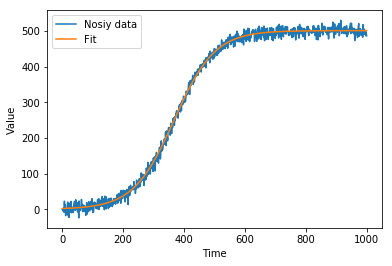

In [6]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.01, 450
sigma0 = [0.01, 100]
found_parameters, found_value = pints.snes(
    score,
    boundaries,
    x0,
    sigma0,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()